**Change runtime type --> GPU**

**Mount drive**

**Provide dataset path**

**Choose keywords from dataset**

**Extract MFCC features of all wav files in the dataset**

**Save MFCCs and labels in JSON format (provide path to store json)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import librosa
#import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
#import cv2
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import os
import json

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set only the first GPU as visible
        tf.config.set_visible_devices(gpus[0], 'GPU')
        # Allow memory growth to allocate memory dynamically on the GPU
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU configuration successful.")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected.")

GPU configuration successful.


In [ ]:
DATASET_PATH = "drive/MyDrive/raw_data"

#kws_list=['on','off','up','down','unknown','background_noise']

kws_list=['up','down','unknown']

#lang_index_dict={kws_list[i]:i for i in range(len(kws_list))}
#print(lang_index_dict)

for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):

    # ensure we're at sub-folder level
    if dirpath is not DATASET_PATH:

        # save label (i.e., sub-folder name) in the mapping
        label = dirpath.split("/")[-1]
        print(label)

JSON_PATH = "drive/MyDrive/tinyML_projects/data.json"


off
background_noise
unknown
down
up
on


In [ ]:
sr=16000
SAMPLES_TO_CONSIDER = 16000 # 1 sec. of audio

frame_length = int(sr * ( 32 / 1000))
hop_length = int(sr * ( 16 / 1000))

data = {
        "mapping": [],
        "labels": [],
        "MFCCs": [],
        "files": []
    }

j=0
# loop through all sub-dirs
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):

    # ensure we're at sub-folder level
    if dirpath is not DATASET_PATH:

        # save label (i.e., sub-folder name) in the mapping
        label = dirpath.split("/")[-1]

        if label in kws_list:
            j = j+1
            print("\nProcessing: '{}'".format(label))
            # process all audio files in sub-dir and store MFCCs
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                #print(file_path)
                # load audio file and slice it to ensure length consistency among different files
                signal,_=librosa.load(file_path,sr=sr)
                if len(signal)>=SAMPLES_TO_CONSIDER:
                    signal=signal[0:SAMPLES_TO_CONSIDER]
                else:
                    npad = SAMPLES_TO_CONSIDER - len(signal)
                    signal=np.pad(signal, pad_width=npad, mode='constant', constant_values=0)[npad:]

                signal=signal.astype(np.float32)

                f=librosa.feature.mfcc(y=signal, sr=sr, win_length = frame_length,hop_length=hop_length,n_mfcc=13, n_fft = frame_length,center=0)
                #print(f.shape)
                #print("{}- {}".format(">=" , f.shape))
                # store data for analysed track
                data["labels"].append(j-1)
                data["MFCCs"].append(f.T.tolist())
                data["files"].append(file_path)
                print("{}: {}- {} ".format(file_path, label , j-1))

    # save data in json file
    with open(JSON_PATH, "w") as fp:
        json.dump(data, fp, indent= 4)   #### indent= 4


Streaming output truncated to the last 5000 lines.
drive/MyDrive/raw_data/unknown/unknown_2074.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_21.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2107.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2071.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2147.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2104.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2099.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2079.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2116.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2090.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2101.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2068.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_214.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2139.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknown_2132.wav: unknown- 1 
drive/MyDrive/raw_data/unknown/unknow

**Setup Environment**

Install Dependencies

In [ ]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import csv
from tensorflow.keras import optimizers
import keras
from functools import partial
# from keras.backend import sigmoid
from math import exp
from tensorflow.keras.utils import get_custom_objects
from keras.layers import Activation
from keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.preprocessing import StandardScaler
import os
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import joblib
import pickle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
from itertools import cycle

from sklearn.metrics import roc_curve
from keras.models import load_model


**Check GPU configuration**

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set only the first GPU as visible
        tf.config.set_visible_devices(gpus[0], 'GPU')
        # Allow memory growth to allocate memory dynamically on the GPU
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU configuration successful.")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected.")

In [ ]:
!nvidia-smi -L

**Load data from JSON file**

A few functions are declared

In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.
    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["MFCCs"])

    y = np.array(data["labels"])
    y = y[..., np.newaxis]


    print("Training sets loaded!")

    print(X.shape)
    print(y.shape)

    return X, y

In [ ]:
def prepare_dataset(data_path, test_size=0.2, validation_size=0.2):
    """Creates train, validation and test sets.
    :param data_path (str): Path to json file containing data
    :param test_size (flaot): Percentage of dataset used for testing
    :param validation_size (float): Percentage of train set used for cross-validation
    :return X_train (ndarray): Inputs for the train set
    :return y_train (ndarray): Targets for the train set
    :return X_validation (ndarray): Inputs for the validation set
    :return y_validation (ndarray): Targets for the validation set
    :return X_test (ndarray): Inputs for the test set
    :return X_test (ndarray): Targets for the test set
    """

    # load dataset
    X, y = load_data(data_path)
    #print(X.shape)

    ################################## Scaleing the data #############################
    scaler = StandardScaler()
    num_instances, num_time_steps, num_features = X.shape

    X = X.reshape(-1, num_features)

    X = scaler.fit_transform(X)

    #####################################
    # Save the scaler to a file
    joblib.dump(scaler, 'scaler.pkl')
    #####################################

    #reshapeing

    X = X.reshape(num_instances, num_time_steps, num_features)

    ##################################################################################

    # create train, validation, test split
    X_train_1, X_test, y_train_1, y_test = train_test_split(X,y, stratify= y, test_size=test_size, random_state=50)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_1,y_train_1,  stratify= y_train_1, test_size=validation_size, random_state=50)


    print(X_train.shape)
    # add an axis to nd array
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]






    return X_train, y_train, X_validation, y_validation, X_test, y_test

In [ ]:
# This function keeps the initial learning rate for the first ten epochs
# and decreases it exponentially after that.
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))
        #return lr * tf.math.exp(-0.1)
        #return lr * ops.exp(-0.1)

def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation,checkpoint_path):
    """Trains model
    :param epochs (int): Num training epochs
    :param batch_size (int): Samples per batch
    :param patience (int): Num epochs to wait before early stop, if there isn't an improvement on accuracy
    :param X_train (ndarray): Inputs for the train set
    :param y_train (ndarray): Targets for the train set
    :param X_validation (ndarray): Inputs for the validation set
    :param y_validation (ndarray): Targets for the validation set
    :return history: Training history
    """
    Learning_Rate_Scheduler = keras.callbacks.LearningRateScheduler(scheduler)
    #earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=0.001, patience=patience,mode='max')
    checkpoint_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    # train model
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[checkpoint_callback,Learning_Rate_Scheduler], verbose=1)  #[earlystop_callback, checkpoint_callback,Learning_Rate_Scheduler]

    return history

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train_accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="train_loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()

    # Exclude the first few epochs so the graph is easier to read

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'g.', label='Training loss')
    plt.plot(epochs, val_loss, 'rx', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
DATA_PATH = "drive/MyDrive/tinyML_projects/data.json"
#class_names = ['down', 'up', 'on', 'unknown', 'background_noise', 'off']
class_names = [ 'up','down', 'unknown']
EPOCHS = 50
BATCH_SIZE = 128
PATIENCE = 5
LEARNING_RATE = 0.0001
SKIP = 1
CLASS =3

In [ ]:
# generate train, validation and test sets
X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(DATA_PATH)

#print(np.isnan(y_train))

Training sets loaded!
(7748, 61, 13)
(7748, 1)
(4958, 61, 13)


In [ ]:
def leaky_relu(z, name =None):
    return tf.maximum(0.01*z,z, name= name)
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z

def swish(x,name =None):     # or   silu  both are same
    return (x.sigmoid(x)*x)


get_custom_objects().update({'swish': Activation(swish)})

def build_2D_CNN_model(input_shape, learning_rate, loss="sparse_categorical_crossentropy"):
    """Build neural network using keras.
    :param input_shape (tuple): Shape of array representing a sample train. E.g.: (61, 13, 1)
    :param loss (str): Loss function to use
    :param learning_rate (float):
    :return model: TensorFlow model
    """

    # build network architecture using convolutional layers
    model = tf.keras.models.Sequential()
    # 1st conv layer

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="silu",padding='same', input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))
    tf.keras.layers.Dropout(0.5)

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="silu",padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))
    tf.keras.layers.Dropout(0.5)


    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation="silu"))
    tf.keras.layers.Dropout(0.5)

    # softmax output layer
    model.add(tf.keras.layers.Dense(CLASS, activation='softmax'))


    optimiser = tf.optimizers.Adam(learning_rate=learning_rate, epsilon = 1e-08)   #, decay = 0.0)

    #optimiser= keras.optimizers.RMSprop(learning_rate=learning_rate, momentum =0.9, epsilon = 1e-10)
    # compile model
    model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])

    # print model parameters on console
    model.summary()

    return model

In [ ]:
checkpoint_path = "drive/MyDrive/tinyML_projects/KWS/2D_CNN.keras"
SAVED_MODEL_PATH = "drive/MyDrive/tinyML_projects/KWS/2D_CNN.h5"

# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
print(X_train.shape)
print(y_train.shape)
model = build_2D_CNN_model(input_shape, learning_rate=LEARNING_RATE)

# train network
history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation,checkpoint_path)

# plot accuracy/loss for training/validation set as a function of the epochs
plot_history(history)


###########################
# Check if the file already exists and delete it
if os.path.exists(SAVED_MODEL_PATH):
    os.remove(SAVED_MODEL_PATH)


    # save model
model.save(SAVED_MODEL_PATH)

In [ ]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy on last model: {}".format(test_loss, 100*test_acc))

trained_model = load_model("drive/MyDrive/tinyML_projects/KWS/2D_CNN.keras")

# evaluate network on test set
test_loss, test_acc = trained_model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy on best model: {}".format(test_loss, 100*test_acc))

# Making predictions on the test set
y_pred_probs = model.predict(X_test)  # Assuming model output probabilities for each class
y_pred = y_pred_probs.argmax(axis=1)  # Extracting the index of the class with the highest probability

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate precision, recall, and F1 score (use 'average' parameter for multi-class problems)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute AUC-ROC score for each class
auc_scores = []
for i in range(CLASS):
    auc = roc_auc_score(y_bin[:, i], y_pred_probs[:, i])
    auc_scores.append(auc)
    #print(f"AUC-ROC Score for class {class_names[i]}: {auc}")

# Compute macro-average AUC-ROC score
macro_roc_auc_ovr = roc_auc_score(y_bin, y_pred_probs, average="macro", multi_class="ovr")
print(f"Macro-average AUC-ROC Score: {macro_roc_auc_ovr}")

# Compute weighted-average AUC-ROC score
weighted_roc_auc_ovr = roc_auc_score(y_bin, y_pred_probs, average="weighted", multi_class="ovr")
print(f"Weighted-average AUC-ROC Score: {weighted_roc_auc_ovr}")

# Plot ROC curves for each class
fpr = dict()
tpr = dict()
for i in range(CLASS):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_probs[:, i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
plt.figure()
for i, color in zip(range(CLASS), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of {0} (area = {1:0.2f})'.format(class_names[i], auc_scores[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# 1D CNN

In [ ]:
############################# Run one time for removing the axis #########################
# Remove the added axis
X_train = np.squeeze(X_train, axis=-1)
X_test = np.squeeze(X_test, axis=-1)
X_validation = np.squeeze(X_validation, axis=-1)

###########################################################################################

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, GlobalAveragePooling1D, Dense

def build_1D_CNN_model(input_shape, learning_rate , loss="sparse_categorical_crossentropy"):
    model = Sequential()

    # Add 1D-CNN layers
    model.add(Conv1D(filters=500, kernel_size=5, strides=1, activation='relu', input_shape= input_shape))   #(None, 1)
    model.add(Conv1D(filters=500, kernel_size=7, strides=2, activation='relu'))
    model.add(Conv1D(filters=500, kernel_size=1, strides=1, activation='relu'))
    #model.add(Conv1D(filters=3000, kernel_size=1, strides=1, activation='relu'))

    model.add(keras.layers.Dropout(0.3))

    # Global average pooling
    model.add(GlobalAveragePooling1D())

    # Fully connected layers
    model.add(Dense(1500, activation='relu'))
    model.add(Dense(600, activation='relu'))

    # Softmax layer
    model.add(Dense(CLASS, activation='softmax'))


    optimiser = tf.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08) #, decay=0.0)

    model.compile(optimizer=optimiser, loss=loss,metrics=["accuracy"])

    model.summary()

    return model

(4958, 61, 13)
(4958, 1)
(61, 13)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 57, 500)             │          33,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 26, 500)             │       1,750,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 26, 500)             │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 26, 500)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 500)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │         751,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 600)                 │         900,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │           1,803 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,687,903 (14.07 MB)

 Trainable params: 3,687,903 (14.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5176 - loss: 0.8357
Epoch 1: val_accuracy improved from -inf to 0.70323, saving model to drive/MyDrive/tinyML_projects/1D_CNN.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.5200 - loss: 0.8326 - val_accuracy: 0.7032 - val_loss: 0.6154 - learning_rate: 1.0000e-04
Epoch 2/50
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7372 - loss: 0.5473
Epoch 2: val_accuracy improved from 0.70323 to 0.76452, saving model to drive/MyDrive/tinyML_projects/1D_CNN.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7385 - loss: 0.5452 - val_accuracy: 0.7645 - val_loss: 0.4904 - learning_rate: 1.0000e-04
Epoch 3/50
37/39 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8038 - loss: 0.4313
Epoch 3: val_accuracy improved from 0.76452 to 0.80323, saving model to drive/MyDrive/tinyML_projects/1D_CNN.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8043 - loss: 0.4303 - val_accuracy: 0.8032 - val_loss: 0.4

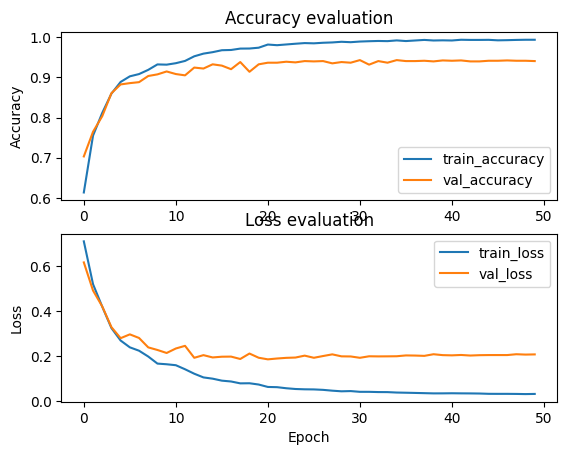

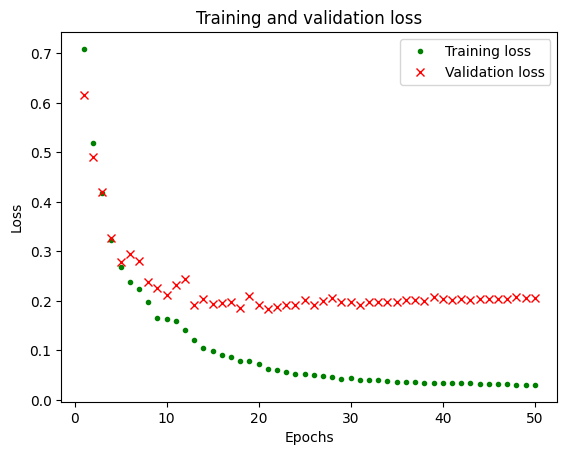

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Confusion Matrix:
[[ 34   0   0]
 [  0 684  48]
 [  0  38 746]]
                  precision    recall  f1-score   support

background_noise       1.00      1.00      1.00        34
         unknown       0.95      0.93      0.94       732
            down       0.94      0.95      0.95       784

        accuracy                           0.94      1550
       macro avg       0.96      0.96      0.96      1550
    weighted avg       0.94      0.94      0.94      1550

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9369 - loss: 0.1814

Test loss: 0.1719062626361847, test accuracy: 94.4516122341156

Precision: 0.944566592397138
Recall: 0.944516129032258
F1 Score: 0.9445011360841737
EER: 0.9120
Cavg: 0.0362
Macro-average AUC-ROC Score: 0.9913412012127268
Weighted-average AUC-ROC Score: 0.9872968150909266


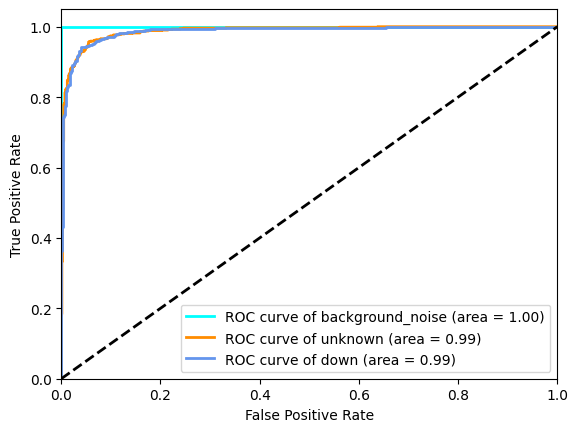

In [ ]:
import os
checkpoint_path = "drive/MyDrive/tinyML_projects/KWS/1D_CNN.keras"
SAVED_MODEL_PATH = "drive/MyDrive/tinyML_projects/KWS/1D_CNN.h5"



# Reshape the input data to match the expected shape of the model

input_shape=X_train.shape[1:]
print(X_train.shape)
print(y_train.shape)
print(input_shape)


model = build_1D_CNN_model(input_shape, learning_rate=LEARNING_RATE)

# train network
history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation,checkpoint_path)
# plot accuracy/loss for training/validation set as a function of the epochs
plot_history(history)



# Check if the file already exists and delete it
if os.path.exists(SAVED_MODEL_PATH):
    os.remove(SAVED_MODEL_PATH)

# save model
model.save(SAVED_MODEL_PATH)

In [ ]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy on last model: {}".format(test_loss, 100*test_acc))

trained_model = load_model("drive/MyDrive/tinyML_projects/KWS/1D_CNN.keras")

# evaluate network on test set
test_loss, test_acc = trained_model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy on best model: {}".format(test_loss, 100*test_acc))



# Making predictions on the test set
y_pred_probs = model.predict(X_test)  # Assuming model output probabilities for each class
y_pred = y_pred_probs.argmax(axis=1)  # Extracting the index of the class with the

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# show classification report
print(classification_report(y_test, y_pred, target_names=class_names))

# Calculate precision, recall, and F1 score (use 'average' parameter for multi-class problems)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# Binarize the output labels for multiclass ROC AUC computation
y_bin = label_binarize(y_test, classes=np.arange(CLASS))

#print(f"y shape: {y.shape}")
#print(f"y_pred_prob shape: {y_pred_prob.shape}")

# Compute AUC-ROC score for each class
auc_scores = []
for i in range(CLASS):
    auc = roc_auc_score(y_bin[:, i], y_pred_probs[:, i])
    auc_scores.append(auc)
    #print(f"AUC-ROC Score for class {class_names[i]}: {auc}")

# Compute macro-average AUC-ROC score
macro_roc_auc_ovr = roc_auc_score(y_bin, y_pred_probs, average="macro", multi_class="ovr")
print(f"Macro-average AUC-ROC Score: {macro_roc_auc_ovr}")

# Compute weighted-average AUC-ROC score
weighted_roc_auc_ovr = roc_auc_score(y_bin, y_pred_probs, average="weighted", multi_class="ovr")
print(f"Weighted-average AUC-ROC Score: {weighted_roc_auc_ovr}")

# Plot ROC curves for each class
fpr = dict()
tpr = dict()
for i in range(CLASS):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_probs[:, i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
plt.figure()
for i, color in zip(range(CLASS), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of {0} (area = {1:0.2f})'.format(class_names[i], auc_scores[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
########################

# TCN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def tcn_block(inputs, filters, kernel_size, dilation_rate):
    """A dilated convolutional block with skip connections."""
    conv = layers.Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding="causal")(inputs)
    conv = layers.BatchNormalization()(conv)
    conv = layers.Activation("relu")(conv)
    skip = layers.Conv1D(filters, 1, padding="causal")(inputs)
    skip = layers.BatchNormalization()(skip)
    output = layers.add([conv, skip])
    return output

def create_tcn_model(input_shape, learning_rate, loss="sparse_categorical_crossentropy"):
    """Creates a TCN model."""
    inputs = keras.Input(shape=input_shape)
    x = tcn_block(inputs, 32, 3, 1)  # Block 1
    x = tcn_block(x, 64, 3, 2)   # Block 2
    x = tcn_block(x, 128, 3, 4)   # Block 3
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(500, activation='relu')(x)
    x = layers.Dense(500, activation='relu')(x)
    x = layers.Dense(300, activation='relu')(x)
    outputs = layers.Dense(CLASS, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    optimiser = tf.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)   #, decay=0.0)
    model.compile(optimizer=optimiser, loss=loss,metrics=["accuracy"])

    model.summary()

    return model

(4958, 61, 13)
(4958, 1)
(61, 13)


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 61, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 61, 32)         │          1,280 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 61, 32)         │            128 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 61, 32)         │            448 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 61, 32)         │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 61, 32)         │            128 │ conv1d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 61, 32)         │              0 │ activation_1[0][0],    │
│                           │                        │                │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 61, 64)         │          6,208 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 61, 64)         │            256 │ conv1d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 61, 64)         │          2,112 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 61, 64)         │              0 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 61, 64)         │            256 │ conv1d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 61, 64)         │              0 │ activation_2[0][0],    │
│                           │                        │                │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 61, 128)        │         24,704 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 61, 128)        │            512 │ conv1d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)    

 Total params: 511,067 (1.95 MB)

 Trainable params: 510,171 (1.95 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.5951 - loss: 0.8315
Epoch 1: val_accuracy improved from -inf to 0.65323, saving model to drive/MyDrive/tinyML_projects/TCN.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 242ms/step - accuracy: 0.5965 - loss: 0.8285 - val_accuracy: 0.6532 - val_loss: 0.6480 - learning_rate: 1.0000e-04
Epoch 2/50
36/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7092 - loss: 0.5671
Epoch 2: val_accuracy improved from 0.65323 to 0.70887, saving model to drive/MyDrive/tinyML_projects/TCN.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7112 - loss: 0.5645 - val_accuracy: 0.7089 - val_loss: 0.5733 - learning_rate: 1.0000e-04
Epoch 3/50
34/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7569 - loss: 0.5037
Epoch 3: val_accuracy improved from 0.70887 to 0.73306, saving model to drive/MyDrive/tinyML_projects/TCN.keras
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7577 - loss: 0.5021 - val_accuracy: 0.7331 - val_loss: 0.5240 - learn

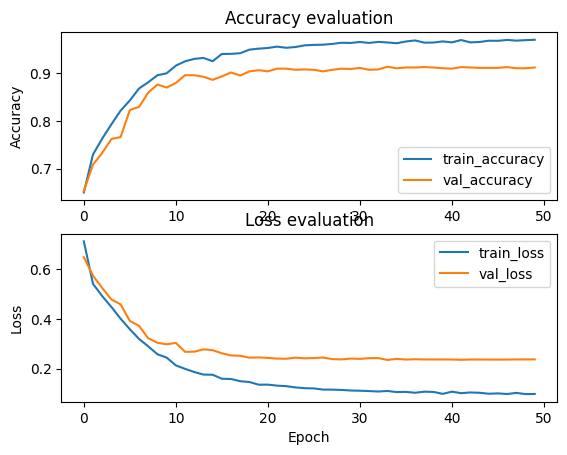

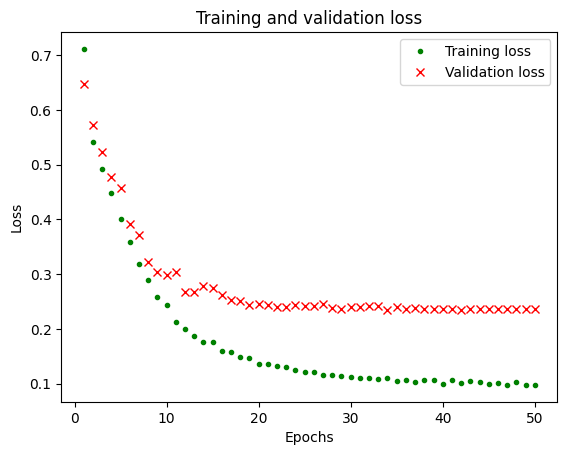

49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9189 - loss: 0.2008

Test loss: 0.21156159043312073, test accuracy: 91.29032492637634
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Confusion Matrix:
[[ 34   0   0]
 [  0 656  76]
 [  0  59 725]]

Precision: 0.9130388300435419
Recall: 0.9129032258064517
F1 Score: 0.9128586804657689
EER: 0.8863
Cavg: 0.0561
Macro-average AUC-ROC Score: 0.9826446031459865
Weighted-average AUC-ROC Score: 0.9745381777849806


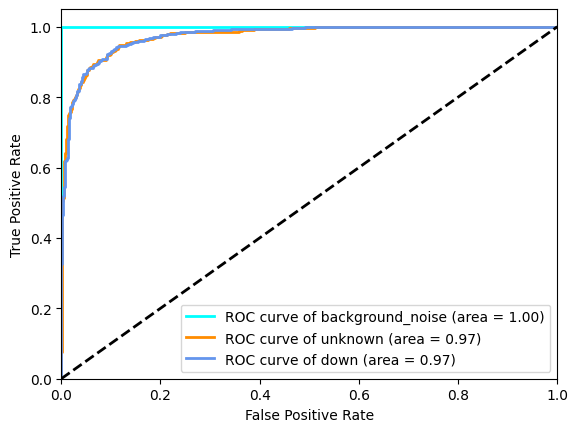

In [ ]:
import os
checkpoint_path = "drive/MyDrive/tinyML_projects/KWS/TCN.keras"
SAVED_MODEL_PATH = "drive/MyDrive/tinyML_projects/KWS/TCN.h5"


# Reshape the input data to match the expected shape of the model

input_shape=X_train.shape[1:]
print(X_train.shape)
print(y_train.shape)
print(input_shape)

#print(input_shape.shape)
#print(X_validation_reshaped.shape)

#print(input_shape)

model = create_tcn_model(input_shape, learning_rate=LEARNING_RATE)

# train network
history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation,checkpoint_path)
# plot accuracy/loss for training/validation set as a function of the epochs
plot_history(history)


###########################
# Check if the file already exists and delete it
if os.path.exists(SAVED_MODEL_PATH):
    os.remove(SAVED_MODEL_PATH)

# save model
model.save(SAVED_MODEL_PATH)

In [ ]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy on last model: {}".format(test_loss, 100*test_acc))

model = load_model("drive/MyDrive/tinyML_projects/KWS/TCN.keras")

# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy on best model: {}".format(test_loss, 100*test_acc))

# Making predictions on the test set
y_pred_probs = model.predict(X_test)  # Assuming model output probabilities for each class
y_pred = y_pred_probs.argmax(axis=1)  # Extracting the index of the class with the


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate precision, recall, and F1 score (use 'average' parameter for multi-class problems)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

###########################
# Binarize the output labels for multiclass ROC AUC computation
y_bin = label_binarize(y_test, classes=np.arange(CLASS))

#print(f"y shape: {y.shape}")
#print(f"y_pred_prob shape: {y_pred_prob.shape}")

# Compute AUC-ROC score for each class
auc_scores = []
for i in range(CLASS):
    auc = roc_auc_score(y_bin[:, i], y_pred_probs[:, i])
    auc_scores.append(auc)
    #print(f"AUC-ROC Score for class {class_names[i]}: {auc}")

# Compute macro-average AUC-ROC score
macro_roc_auc_ovr = roc_auc_score(y_bin, y_pred_probs, average="macro", multi_class="ovr")
print(f"Macro-average AUC-ROC Score: {macro_roc_auc_ovr}")

# Compute weighted-average AUC-ROC score
weighted_roc_auc_ovr = roc_auc_score(y_bin, y_pred_probs, average="weighted", multi_class="ovr")
print(f"Weighted-average AUC-ROC Score: {weighted_roc_auc_ovr}")

# Plot ROC curves for each class
fpr = dict()
tpr = dict()
for i in range(CLASS):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_probs[:, i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
plt.figure()
for i, color in zip(range(CLASS), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of {0} (area = {1:0.2f})'.format(class_names[i], auc_scores[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Extra code

In [ ]:
def build_DSCNNmodel(input_shape, learning_rate, loss="sparse_categorical_crossentropy"):
    """Build neural network using keras.
    :param input_shape (tuple): Shape of array representing a sample train. E.g.: (61, 13, 1)
    :param loss (str): Loss function to use
    :param learning_rate (float):
    :return model: TensorFlow model
    """

    # build network architecture using convolutional layers
    model = tf.keras.models.Sequential()
    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(1, 1), padding='same', activation='silu'))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 1), padding='same', activation='silu'))
    #model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="silu",padding='same', input_shape=input_shape))
    model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', depth_multiplier=1, strides=(1, 1), activation='silu'))

    model.add(tf.keras.layers.BatchNormalization())
    #model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))
    tf.keras.layers.Dropout(0.5)

    # 2nd conv layer
    #model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="silu",padding='same'))
    model.add(tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', depth_multiplier=2, strides=(1, 1), activation='silu'))

    model.add(tf.keras.layers.BatchNormalization())
   # model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))
    tf.keras.layers.Dropout(0.5)


#     # 3rd conv layer

#     model.add(tf.keras.layers.Conv2D(128, (3, 3), activation="silu",padding='same'))
#     #model.add(tf.keras.layers.Conv2D(128, (3, 3), activation="silu",padding='same'))
#     model.add(tf.keras.layers.BatchNormalization())
#     #model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))
#     tf.keras.layers.Dropout(0.3)


    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(128, activation="silu"))
#     tf.keras.layers.Dropout(0.5)
    model.add(tf.keras.layers.Dense(64, activation="silu"))
    tf.keras.layers.Dropout(0.5)

    # softmax output layer
    model.add(tf.keras.layers.Dense(CLASS, activation='softmax'))


    optimiser = tf.optimizers.Adam(learning_rate=learning_rate, epsilon = 1e-08)   #, decay = 0.0)

    #optimiser= keras.optimizers.RMSprop(learning_rate=learning_rate, momentum =0.9, epsilon = 1e-10)
    # compile model
    model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])

    # print model parameters on console
    model.summary()

    return model